In [1]:
import os
import string
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import platform
print(platform.python_version())

3.4.3


In [3]:
file_name = '/data/1/rathish/workspace/classification_work/new_labeled_resume.pkl'
df = pd.read_pickle(file_name)

In [6]:
df.shape
df.columns.values

array(['clean_text', 'industry', 'nmf_ranks', 'len'], dtype=object)

In [9]:
df['clean_text'].iloc[0]

'high school data manager, twenty four years work experience education system programs dating back sims, nc wise power school. performs variety technical, computer organizational skills using computerized student information system generate accounting procedures. includes maintaining student records high degree accuracy preparing customized reports state local level. supports school operations able communicate effectively using confidentiality principals, counselors, teachers, central office staff, students, agencies, institutions higher education.'

In [10]:
df.head()

,clean_text,industry,nmf_ranks,len
0,"high school data manager, twenty four years wo...",Education and Training,6,65
3,highly organized meticulous bookkeeper experie...,Accounting and Finance,13,67
7,worked different areas healthcare field going ...,Healthcare,4,42
10,visionary solid experience managing levels sta...,Law Enforcement and Security,9,88
13,caring assistant managerdriven deliver excepti...,Funeral Services,20,36


In [142]:
industries = df.industry.unique()
print(industries)
print(len(industries))

nmf_ranks = df.nmf_ranks.unique()
print(nmf_ranks)

['Education and Training' 'Accounting and Finance' 'Healthcare'
 'Law Enforcement and Security' 'Funeral Services' 'Customer Service'
 'Administrative Support' 'Installation and Maintenance'
 'Food and Beverage' 'Sales' 'Management' 'Manufacturing and Production'
 'Insurance' 'Legal' 'Business' nan 'Computers and Technology'
 'Banking and Financial Services' 'Transportation and Distribution'
 'Marketing, Advertising and PR' 'Construction' 'Retail' 'Engineering'
 'Fitness and Recreation' 'Performing Arts' 'Nursing' 'Skilled Trades'
 'Science' 'Human Resources' 'Psychology' 'Childcare'
 'Community and Public Service' 'Dental' 'Green Jobs' 'Military'
 'Government' 'Entertainment and Media' 'Real Estate'
 'Art, Fashion and Design' 'Personal Services'
 'Natural Resources and Agriculture' 'Veterinary' 'Beauty and Spa'
 'Social Sciences' 'Sports' 'Pharmacy' 'Travel and Hospitality'
 'Humanities and Liberal Arts' 'Telecommunications and Wireless'
 'Architecture' 'Library' 'Textile and Apparel'

In [22]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

,nmf_ranks,len
count,3895210.00,3895210.00
mean,13.23,83.59
std,9.11,59.93
min,0.00,17.00
25%,6.00,49.00
50%,12.00,68.00
75%,21.00,98.00
max,30.00,7523.00


In [21]:
df['industry'].value_counts()

Customer Service                     360205
Healthcare                           238896
Administrative Support               205939
Food and Beverage                    185433
Retail                               157512
Sales                                132672
Manufacturing and Production         122499
Education and Training               107398
Business                              98313
Nursing                               97768
Accounting and Finance                97055
Computers and Technology              94986
Management                            85601
Skilled Trades                        79523
Construction                          76868
Transportation and Distribution       71899
Engineering                           64909
Banking and Financial Services        56990
Marketing, Advertising and PR         53938
Law Enforcement and Security          48451
Human Resources                       42030
Community and Public Service          36735
Installation and Maintenance    

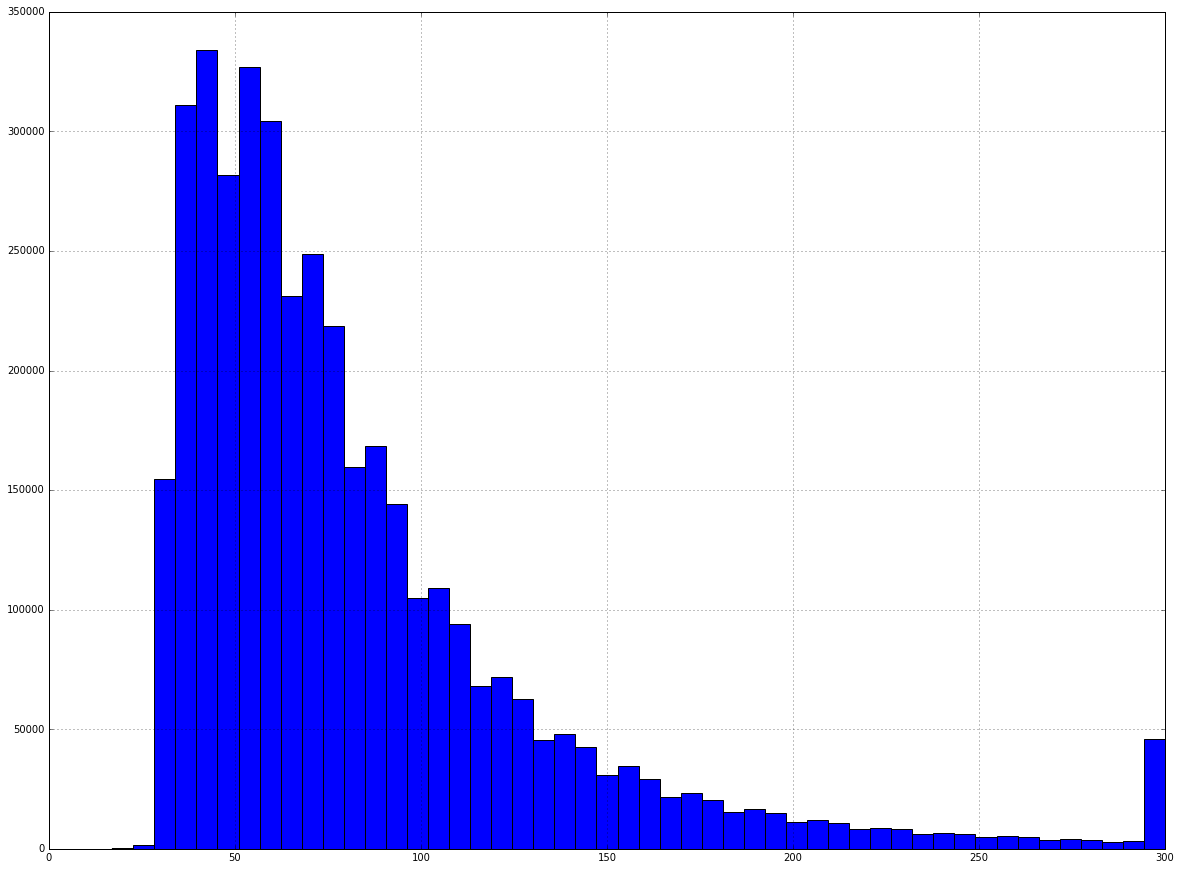

% documents with resume length >= 300 = 1.1141889654216333


In [51]:
max_len = 300
df["truncated_len"] = df["len"] 
df["truncated_len"].where(df["truncated_len"] < max_len, max_len, inplace=True)

df["truncated_len"].hist(bins=50, figsize=(20, 15))
plt.show()

percent_resume = (df["truncated_len"].value_counts()[max_len] / len(df) ) * 100
print("% documents with resume length >= {} = {}".format(max_len, percent_resume))

In [42]:
import sys

punctuations = set(string.punctuation)
print(punctuations)
count = 0

def clean_text(text):
    """global count
    if count % 100 == 0:
        sys.stdout.flush()
        print("processed {} items till now".format(count))
        
    count += 1"""
    text = "".join([x for x in text if x not in punctuations])
    return text

{'@', '#', '^', '`', '/', '&', '|', "'", ',', '[', '?', '-', '(', '\\', '<', '"', '$', '+', '!', '.', ']', '%', '=', '{', ':', '>', ')', ';', '*', '_', '~', '}'}


In [104]:
for i in range(5):
    text = df['clean_text'].iloc[i]
    print(text)
    print()
    print(clean_text(text))
    print("=" * 100)

high school data manager, twenty four years work experience education system programs dating back sims, nc wise power school. performs variety technical, computer organizational skills using computerized student information system generate accounting procedures. includes maintaining student records high degree accuracy preparing customized reports state local level. supports school operations able communicate effectively using confidentiality principals, counselors, teachers, central office staff, students, agencies, institutions higher education.

high school data manager twenty four years work experience education system programs dating back sims nc wise power school performs variety technical computer organizational skills using computerized student information system generate accounting procedures includes maintaining student records high degree accuracy preparing customized reports state local level supports school operations able communicate effectively using confidentiality prin

In [105]:
df['clean_text'] = df['clean_text'].map(lambda x: clean_text(x))

In [107]:
df.columns

Index(['clean_text', 'industry', 'nmf_ranks', 'len', 'truncated_len'], dtype='object')

In [108]:
df.to_pickle("/data/1/anurag/resume_df.pkl")

In [3]:
file_path = "/data/1/anurag/classification/resume_df.pkl"
df = pd.read_pickle(file_path)

In [6]:
print(df.shape)
new_df = df.dropna()

print(new_df.shape)
print(new_df.columns.values)

(3895210, 5)
(2960695, 5)
['clean_text' 'industry' 'nmf_ranks' 'len' 'truncated_len']
high school data manager twenty four years work experience education system programs dating back sims nc wise power school performs variety technical computer organizational skills using computerized student information system generate accounting procedures includes maintaining student records high degree accuracy preparing customized reports state local level supports school operations able communicate effectively using confidentiality principals counselors teachers central office staff students agencies institutions higher education


In [23]:
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [8]:
max_len_resume = 300
embedding_dims = 100
vocabulary_size = 20000

tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(df['clean_text'])

In [9]:
sequences = tokenizer.texts_to_sequences(new_df['clean_text'])
data = pad_sequences(sequences, maxlen=max_len_resume)

In [52]:
# saving tokenizer
import pickle
with open('/data/1/anurag/classification/saved_models/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
num_units = 128

model_lstm = Sequential()
model_lstm.add(Embedding(vocabulary_size, embedding_dims, input_length=max_len_resume))
model_lstm.add(LSTM(num_units, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(51, activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
labels = np.array(new_df['industry'])
encoder = LabelEncoder()
industry_encoded = encoder.fit_transform(labels)

print(encoder.classes_)
print(industry_encoded)

one_hotencoder = OneHotEncoder()
industry_1hot = one_hotencoder.fit_transform(industry_encoded.reshape(-1, 1))

['Accounting and Finance' 'Administrative Support' 'Architecture'
 'Art, Fashion and Design' 'Banking and Financial Services'
 'Beauty and Spa' 'Business' 'Childcare' 'Community and Public Service'
 'Computers and Technology' 'Construction' 'Customer Service' 'Dental'
 'Education and Training' 'Engineering' 'Entertainment and Media'
 'Fitness and Recreation' 'Food and Beverage' 'Funeral Services'
 'Government' 'Green Jobs' 'Healthcare' 'Human Resources'
 'Humanities and Liberal Arts' 'Installation and Maintenance' 'Insurance'
 'Law Enforcement and Security' 'Legal' 'Library' 'Management'
 'Manufacturing and Production' 'Marketing, Advertising and PR' 'Military'
 'Natural Resources and Agriculture' 'Nursing' 'Performing Arts'
 'Personal Services' 'Pharmacy' 'Psychology' 'Real Estate' 'Retail'
 'Sales' 'Science' 'Skilled Trades' 'Social Sciences' 'Sports'
 'Telecommunications and Wireless' 'Textile and Apparel'
 'Transportation and Distribution' 'Travel and Hospitality' 'Veterinary']
[13

/data/1/anurag/mlEnv/lib/python3.4/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [13]:
print(data.shape)
print(industry_1hot.shape)

print(data[:200000].shape)
print(industry_1hot[:200000].shape)

(2960695, 300)
(2960695, 51)
(200000, 300)
(200000, 51)


In [34]:
batch_size = 256
# num_docs = 20000
num_docs = data.shape[0]

model_lstm.fit(data[:num_docs], industry_1hot[:num_docs], validation_split=0.20, batch_size=batch_size, epochs=2)

Train on 2368556 samples, validate on 592139 samples
Epoch 1/2
2368556/2368556 [==============================] - 13567s 6ms/step - loss: 1.4487 - acc: 0.6130 - val_loss: 1.5936 - val_acc: 0.5786
Epoch 2/2
2368556/2368556 [==============================] - 13626s 6ms/step - loss: 1.3443 - acc: 0.6362 - val_loss: 1.5687 - val_acc: 0.5850


In [40]:
model_lstm.fit(data[:num_docs], industry_1hot[:num_docs], validation_split=0.20, batch_size=batch_size, epochs=5)

Train on 2368556 samples, validate on 592139 samples
Epoch 1/5
2368556/2368556 [==============================] - 13639s 6ms/step - loss: 1.3075 - acc: 0.6441 - val_loss: 1.5609 - val_acc: 0.5870
Epoch 2/5
2368556/2368556 [==============================] - 13647s 6ms/step - loss: 1.2838 - acc: 0.6496 - val_loss: 1.5639 - val_acc: 0.5863
Epoch 3/5
2368556/2368556 [==============================] - 13677s 6ms/step - loss: 1.2655 - acc: 0.6535 - val_loss: 1.5694 - val_acc: 0.5870
Epoch 4/5
2368556/2368556 [==============================] - 13694s 6ms/step - loss: 1.2513 - acc: 0.6567 - val_loss: 1.5756 - val_acc: 0.5858
Epoch 5/5
1398272/2368556 [================>.............] - ETA: 1:27:04 - loss: 1.2320 - acc: 0.6613

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2368556/2368556 [==============================] - 13676s 6ms/step - loss: 1.2390 - acc: 0.6596 - val_loss: 1.5864 - val_acc: 0.5852


In [41]:
test_text = "Maintenance of Workplace Health and Safety standards inclusive of sweeping, mopping and disinfecting workshop. Assisting tradesmen undertaking professional duties. Completing opening and closing of business practices. Nurturing team workplace environment. Communicating/interacting with customers. Processing orders for customers. Carrying out servicing. Carrying out daily banking duties. Ordering and procurement of parts. Introduction into MWIN computer system for processing of parts invoices. Effectively working as a team member. Able to take direction from employees/employers of a senior position Able to communicate clearly and efficiently with customers/staff members Operated a cash register for cash, check and credit card transactions with accuracy. Stocked and replenished merchandise according to store merchandising layout Priced merchandise, stocked shelves and took inventory of supplies."

In [43]:
def process_text(text):
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    
    text = " ".join(text)
    text = "".join([x for x in text if x not in punctuations])
    return text

cleaned_text = process_text(test_text)
print(test_text)
print("=" * 100)
print(cleaned_text)

print(len(cleaned_text.split()))

Maintenance of Workplace Health and Safety standards inclusive of sweeping, mopping and disinfecting workshop. Assisting tradesmen undertaking professional duties. Completing opening and closing of business practices. Nurturing team workplace environment. Communicating/interacting with customers. Processing orders for customers. Carrying out servicing. Carrying out daily banking duties. Ordering and procurement of parts. Introduction into MWIN computer system for processing of parts invoices. Effectively working as a team member. Able to take direction from employees/employers of a senior position Able to communicate clearly and efficiently with customers/staff members Operated a cash register for cash, check and credit card transactions with accuracy. Stocked and replenished merchandise according to store merchandising layout Priced merchandise, stocked shelves and took inventory of supplies.
maintenance workplace health safety standards inclusive sweeping mopping disinfecting worksho

In [44]:
sequence = tokenizer.texts_to_sequences([cleaned_text])
input_data = pad_sequences(sequence, maxlen=max_len_resume)
predictions = model_lstm.predict(input_data)

print(predictions)
np.argmax(predictions)

[[4.39864583e-03 1.21216485e-02 3.32751195e-04 9.05947643e-04
  3.38323950e-03 5.22237795e-04 1.97864249e-02 1.45674800e-03
  4.74950485e-03 1.04022142e-03 1.97496247e-02 1.50950968e-01
  6.71656569e-03 4.08532703e-03 3.38918786e-03 6.83928665e-04
  1.35418016e-03 1.22293495e-02 1.31925335e-04 2.22150632e-03
  1.81131135e-03 2.91778799e-02 1.54678174e-03 3.05246911e-04
  1.45119756e-01 9.92137211e-05 2.57036672e-03 7.89040409e-04
  9.68829991e-05 9.01739765e-03 3.60549651e-02 2.58460379e-04
  2.42106835e-04 1.78287085e-03 2.94669415e-03 1.63143748e-04
  2.64538778e-03 9.50018293e-04 4.49044514e-04 5.27966593e-04
  4.37011331e-01 6.80673588e-03 9.33066767e-04 5.54982722e-02
  4.52861947e-04 1.29973458e-04 1.70681661e-03 2.70770659e-04
  5.85865323e-03 9.79057746e-04 3.58802313e-03]]


40

In [39]:
print(input_data)

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0 

In [46]:
encoder.classes_[11]

'Customer Service'

In [48]:
from sklearn.externals import joblib

joblib.dump(encoder, '/data/1/anurag/classification/saved_models/labels_encoder.pkl')

['/data/1/anurag/classification/saved_models/labels_encoder.pkl']

In [49]:
for i in range(len(encoder.classes_)):
    print(i, encoder.classes_[i])

0 Accounting and Finance
1 Administrative Support
2 Architecture
3 Art, Fashion and Design
4 Banking and Financial Services
5 Beauty and Spa
6 Business
7 Childcare
8 Community and Public Service
9 Computers and Technology
10 Construction
11 Customer Service
12 Dental
13 Education and Training
14 Engineering
15 Entertainment and Media
16 Fitness and Recreation
17 Food and Beverage
18 Funeral Services
19 Government
20 Green Jobs
21 Healthcare
22 Human Resources
23 Humanities and Liberal Arts
24 Installation and Maintenance
25 Insurance
26 Law Enforcement and Security
27 Legal
28 Library
29 Management
30 Manufacturing and Production
31 Marketing, Advertising and PR
32 Military
33 Natural Resources and Agriculture
34 Nursing
35 Performing Arts
36 Personal Services
37 Pharmacy
38 Psychology
39 Real Estate
40 Retail
41 Sales
42 Science
43 Skilled Trades
44 Social Sciences
45 Sports
46 Telecommunications and Wireless
47 Textile and Apparel
48 Transportation and Distribution
49 Travel and Hosp

In [50]:
from keras.models import load_model

model_lstm.save('/data/1/anurag/classification/saved_models/lstm_model.h5')

# Ading CNN layer

In [60]:
from keras.callbacks import ModelCheckpoint

filepath="lstm_plus_cnn2_model-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]

In [69]:
num_units = 128

model_conv = Sequential()
model_conv.add(Embedding(vocabulary_size, embedding_dims, input_length=max_len_resume))
model_conv.add(Conv1D(128, 3, activation='relu'))
model_conv.add(MaxPooling1D(pool_size=2))
model_conv.add(LSTM(num_units, dropout=0.2))
model_conv.add(Dense(51, activation='softmax'))
model_conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
model_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 300, 100)          2000000   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 298, 128)          38528     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 149, 128)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_7 (Dense)              (None, 51)                6579      
Total params: 2,176,691
Trainable params: 2,176,691
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 128
# num_docs = 20000
num_docs = data.shape[0]

model_conv.fit(data[:num_docs], industry_1hot[:num_docs], validation_split=0.20, batch_size=batch_size, epochs=7, callbacks=callbacks_list)

Train on 2368556 samples, validate on 592139 samples
Epoch 1/7
2368556/2368556 [==============================] - 10913s 5ms/step - loss: 1.4936 - acc: 0.6008 - val_loss: 1.5940 - val_acc: 0.5794

Epoch 00001: val_acc did not improve from 0.58837
Epoch 2/7
2368556/2368556 [==============================] - 10911s 5ms/step - loss: 1.3394 - acc: 0.6378 - val_loss: 1.5714 - val_acc: 0.5841

Epoch 00002: val_acc did not improve from 0.58837
Epoch 3/7
2368556/2368556 [==============================] - 10910s 5ms/step - loss: 1.3030 - acc: 0.6466 - val_loss: 1.5670 - val_acc: 0.5863

Epoch 00003: val_acc did not improve from 0.58837
Epoch 4/7
2368556/2368556 [==============================] - 10920s 5ms/step - loss: 1.2802 - acc: 0.6517 - val_loss: 1.5658 - val_acc: 0.5861

Epoch 00004: val_acc did not improve from 0.58837
Epoch 5/7
2368556/2368556 [==============================] - 10816s 5ms/step - loss: 1.2637 - acc: 0.6557 - val_loss: 1.5701 - val_acc: 0.5870

Epoch 00005: val_acc did no

In [74]:
model_conv.save('/data/1/anurag/classification/saved_models/lstm_cnn_model.h5')

In [76]:
num_units = 128
embedding_dims = 50

model_conv2 = Sequential()
model_conv2.add(Embedding(vocabulary_size, embedding_dims, input_length=max_len_resume))
model_conv2.add(Conv1D(64, 3, activation='relu'))
model_conv2.add(MaxPooling1D(pool_size=2))
model_conv2.add(LSTM(num_units, dropout=0.1))
model_conv2.add(Dense(51, activation='softmax'))
model_conv2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_conv2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 300, 50)           1000000   
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 298, 64)           9664      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 149, 64)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_9 (Dense)              (None, 51)                6579      
Total params: 1,115,059
Trainable params: 1,115,059
Non-trainable params: 0
_________________________________________________________________


In [78]:
batch_size = 256
# num_docs = 20000
num_docs = data.shape[0]

model_conv2.fit(data[:num_docs], industry_1hot[:num_docs], validation_split=0.20, batch_size=batch_size, epochs=4, callbacks=callbacks_list)

Train on 2368556 samples, validate on 592139 samples
Epoch 1/4
2368556/2368556 [==============================] - 6621s 3ms/step - loss: 1.5287 - acc: 0.5924 - val_loss: 1.6125 - val_acc: 0.5741

Epoch 00001: val_acc did not improve from 0.58837
Epoch 2/4
2368556/2368556 [==============================] - 6617s 3ms/step - loss: 1.3622 - acc: 0.6321 - val_loss: 1.5856 - val_acc: 0.5810

Epoch 00002: val_acc did not improve from 0.58837
Epoch 3/4
2368556/2368556 [==============================] - 6639s 3ms/step - loss: 1.3181 - acc: 0.6424 - val_loss: 1.5683 - val_acc: 0.5852

Epoch 00003: val_acc did not improve from 0.58837
Epoch 4/4
2368556/2368556 [==============================] - 6640s 3ms/step - loss: 1.2897 - acc: 0.6494 - val_loss: 1.5719 - val_acc: 0.5840

Epoch 00004: val_acc did not improve from 0.58837
